<a href="https://colab.research.google.com/github/pjham/BCSTask/blob/main/BCSTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural network from scratch**

Will be working on mnist handwritten digits database

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
#import tensorflow as tf  

In [2]:
!wget https://storage.googleapis.com/mledu-datasets/mnist_train_small.csv -O /tmp/mnist_train_small.csv

--2022-07-20 11:02:38--  https://storage.googleapis.com/mledu-datasets/mnist_train_small.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36523880 (35M) [application/octet-stream]
Saving to: ‘/tmp/mnist_train_small.csv’

/tmp/mnist_train_sm 100%[===================>]  34.83M  83.7MB/s    in 0.4s    

2022-07-20 11:02:39 (83.7 MB/s) - ‘/tmp/mnist_train_small.csv’ saved [36523880/36523880]



In [3]:
data = pd.read_csv(io.open("/tmp/mnist_train_small.csv", "r"),
  sep=",",
  header=None)
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
Y_train

array([0, 8, 8, ..., 1, 2, 6])

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [5]:
def ReLU(Z):
    return np.maximum(Z, 0)


In [6]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [7]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


In [8]:
def ReLU_deriv(Z):
    return Z > 0

In [9]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [10]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [11]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    print("finally")
    predictions = get_predictions(A2)
    print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 4 4 ... 7 9 9] [0 8 8 ... 1 2 6]
0.093
Iteration:  100
[0 1 8 ... 1 2 6] [0 8 8 ... 1 2 6]
0.45810526315789474
Iteration:  200
[0 8 8 ... 1 2 6] [0 8 8 ... 1 2 6]
0.640578947368421
Iteration:  300
[0 8 8 ... 1 2 6] [0 8 8 ... 1 2 6]
0.733578947368421
Iteration:  400
[0 8 8 ... 1 2 6] [0 8 8 ... 1 2 6]
0.7923157894736842
finally
[0 8 8 ... 1 2 6] [0 8 8 ... 1 2 6]
0.8205263157894737


In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [15]:
import random

Prediction:  [9]
Label:  9


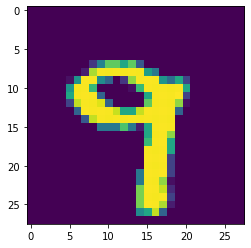

Prediction:  [3]
Label:  3


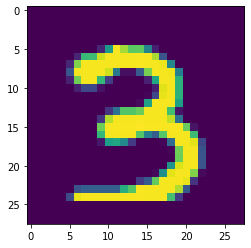

Prediction:  [1]
Label:  7


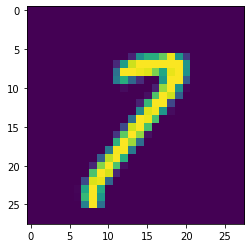

Prediction:  [2]
Label:  2


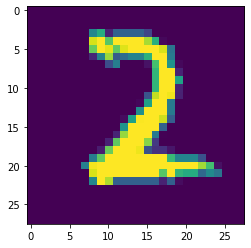

In [17]:
for i in range(4):
  r=random.randrange(0,1000,2)
  test_prediction(r, W1,b1,W2,b2)
  

**CNN using tensorflow**

will be using CNN model to classify cifar10 images of objects

In [47]:
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras.utils import normalize
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = normalize(x_train,axis = 1)
x_test = normalize(x_test,axis = 1)

In [20]:
from keras.models import Sequential
model=Sequential()

In [37]:
from keras.layers import Dense, Dropout, CuDNNLSTM, Conv2D, MaxPooling2D, Flatten

In [55]:
model = Sequential()
model.add(Conv2D(128,kernel_size = (3,3),strides = (1,1),input_shape = x_train.shape[1:],activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (1,1)))

model.add(Conv2D(128,kernel_size = (3,3),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (1,1)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy" , metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 8)

Epoch 1/8
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6273 - accuracy: 0.4212
Epoch 2/8
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2647 - accuracy: 0.5582
Epoch 3/8
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1575 - accuracy: 0.5962
Epoch 4/8
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0828 - accuracy: 0.6213
Epoch 5/8
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0304 - accuracy: 0.6397
Epoch 6/8
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9877 - accuracy: 0.6538
Epoch 7/8
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9477 - accuracy: 0.6701
Epoch 8/8
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9132 - accuracy: 0.6831


In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 29, 29, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 86528)             0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [57]:
eval_score = model.evaluate(
    x_test,
    y_test,
    verbose=2
)

313/313 - 2s - loss: 1.0751 - accuracy: 0.6304 - 2s/epoch - 5ms/step


In [58]:
label=['aeroplane', 'auto mobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship','truck']

TEST  1
Actual : horse
prediction :  horse
TEST  2
Actual : dog
prediction :  dog
TEST  3
Actual : dog
prediction :  dog
TEST  4
Actual : truck
prediction :  truck
TEST  5
Actual : ship
prediction :  auto mobile
CIFAR10 images : 


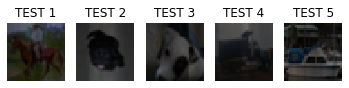

In [64]:
import random
import numpy as np
for i in range(5):
  x=random.random()*10000
  x=int(x)
  plt.subplot(1,5,i+1)
  plt.axis('off')
  a="TEST "+str(i+1)
  plt.title(a)
  plt.imshow(x_test[x],interpolation='Nearest')
  print("TEST ",i+1)
  print("Actual :",label[int(y_test[x])])
  print("prediction : ",label[model.predict(np.array([x_test[x]])).argmax()])
print("CIFAR10 images : ")

**RNN(CuDNNLSTM) using tensorflow **

will be using an RNN model to classify MNIST digits

In [4]:
import tensorflow as tf
from keras.datasets import mnist


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape,y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
x_train=x_train.astype('float32')/255.0

x_test=x_test.astype('float32')/255.0


In [13]:
from keras.models import Sequential
model=Sequential()

In [12]:
from keras.layers import Dense, Dropout, CuDNNLSTM

In [14]:
model.add(CuDNNLSTM(128,input_shape=(x_train.shape[1:]),return_sequences=True))
model.add(Dropout(0.3))
model.add(CuDNNLSTM(128))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer = tf.keras.optimizers.Adam(),loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 14s 6ms/step - loss: 0.5320 - accuracy: 0.8396
Epoch 2/4
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1877 - accuracy: 0.9521
Epoch 3/4
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1363 - accuracy: 0.9639
Epoch 4/4
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1147 - accuracy: 0.9692


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_3 (CuDNNLSTM)    (None, 28, 128)           80896     
                                                                 
 dropout_2 (Dropout)         (None, 28, 128)           0         
                                                                 
 cu_dnnlstm_4 (CuDNNLSTM)    (None, 128)               132096    
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 217,450
Trainable params: 217,450
Non-tr

In [16]:
eval_score = model.evaluate(
    x_test,
    y_test,
    verbose=2
)

313/313 - 2s - loss: 0.0751 - accuracy: 0.9836 - 2s/epoch - 7ms/step


TEST  1
actual digit : 4
prediction :  4
TEST  2
actual digit : 7
prediction :  7
TEST  3
actual digit : 2
prediction :  2
TEST  4
actual digit : 0
prediction :  0
TEST  5
actual digit : 7
prediction :  7
MNIST handwritten : 


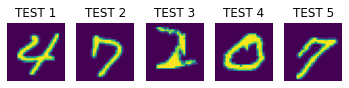

In [20]:
import random
import numpy as np
from matplotlib import pyplot
for i in range(5):
  x=random.random()*10000
  x=int(x)
  pyplot.subplot(1,5,i+1)
  pyplot.axis('off')
  a="TEST "+str(i+1)
  pyplot.title(a)
  pyplot.imshow(x_test[x])
  print("TEST ",i+1)
  print("actual digit :",y_test[x])
  print("prediction : ",model.predict(np.array([x_test[x]])).argmax())
print("MNIST handwritten : ")